In [ ]:
import keras
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
import splitfolders
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [ ]:
SEED = 1234
img_size = 224

In [ ]:
input_dir="C:/Users/Lion/Desktop/Grapevine_Leaves_Image_Dataset/Grapevine_Leaves_Image_Dataset"

In [ ]:
adam=Adam(learning_rate=0.001)

In [ ]:
def get_label(Y):
  labels = []
  for y in Y:
    yy = np.array(y)
    i = np.argmax(yy)
    labels.append(i)

  return np.array(labels)

In [ ]:
def get_confusion_matrix(y_true, y_pred):
  y_pred_labels = get_label(y_pred)
  y_true_labels = get_label(y_test)
  print(tf.math.confusion_matrix(y_true_labels, y_pred_labels))

In [ ]:
image_size = (224,224)
batch_size = 32
all_ds = tf.keras.preprocessing.image_dataset_from_directory(
    input_dir,
    seed=SEED,
    label_mode="categorical",
    image_size=image_size,
    batch_size=batch_size,
)

Found 500 files belonging to 5 classes.


In [ ]:
X_all = []
y_all = []

for x,y in all_ds.unbatch():
  X_all.append(x)
  y_all.append(y)

X_all = np.array(X_all)
y_all = np.array(y_all)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_all, y_all, test_size=0.2)
X_all = []
y_all = []

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range=0.2,
                         height_shift_range=0.2,
                         zoom_range=0.2,
                         fill_mode='nearest',
                         horizontal_flip = True,
                         vertical_flip = True,
                         rescale=1./255)
rescale_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
new_X_train = []
new_y_train = []

In [ ]:
for i in range(400):
  x = np.array(X_train[i])
  x = np.expand_dims(x, 0)
  imgenerator = train_datagen.flow(x, batch_size = 1)
  for j in range(10):
    batch = imgenerator.next()
    new_X_train.append(batch[0])
    new_y_train.append(y_train[i])

In [ ]:
new_X_train = np.array(new_X_train)
new_y_train = np.array(new_y_train)

In [ ]:
X_test = X_test/255

In [ ]:
X_train = X_train / 255

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(np.concatenate((X_train,new_X_train)), np.concatenate((y_train,new_y_train)), test_size=0.2)

In [ ]:
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_train = np.array(X_train)
y_train = np.array(y_train)
new_X_train = []
new_y_train = []

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (img_size,img_size,3)) ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(500,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = SEED),
    tf.keras.layers.Dense(5,activation = "softmax")   #Adding the Output Layer
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_12 (Bat  (None, 222, 222, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_13 (Bat  (None, 109, 109, 32)     128       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_valid,y_valid),
                    steps_per_epoch=len(X_train)//batch_size,
                    epochs=50,
                    validation_steps=len(X_valid)//batch_size,
                    verbose=1)

Epoch 1/50
110/110 [==============================] - 6s 47ms/step - loss: 2.5886 - acc: 0.1977 - val_loss: 1.6406 - val_acc: 0.2023
Epoch 2/50
110/110 [==============================] - 5s 43ms/step - loss: 1.9206 - acc: 0.2077 - val_loss: 1.6194 - val_acc: 0.2125
Epoch 3/50
110/110 [==============================] - 5s 43ms/step - loss: 1.7745 - acc: 0.2031 - val_loss: 1.6132 - val_acc: 0.2023
Epoch 4/50
110/110 [==============================] - 5s 43ms/step - loss: 1.7402 - acc: 0.2060 - val_loss: 1.6022 - val_acc: 0.2330
Epoch 5/50
110/110 [==============================] - 5s 43ms/step - loss: 1.6960 - acc: 0.2114 - val_loss: 1.6025 - val_acc: 0.2477
Epoch 6/50
110/110 [==============================] - 5s 43ms/step - loss: 1.6927 - acc: 0.2026 - val_loss: 1.6038 - val_acc: 0.2534
Epoch 7/50
110/110 [==============================] - 5s 43ms/step - loss: 1.6612 - acc: 0.2116 - val_loss: 1.6038 - val_acc: 0.2511
Epoch 8/50
110/110 [==============================] - 5s 43ms/step - 

In [ ]:
result = model.evaluate(X_test,y_test)
print(dict(zip(model.metrics_names, result)))
y_pred = model.predict(X_test)
get_confusion_matrix(y_test, y_pred)

4/4 [==============================] - 0s 10ms/step - loss: 8.9312 - acc: 0.2900
{'loss': 8.931212425231934, 'acc': 0.28999999165534973}
4/4 [==============================] - 0s 11ms/step
tf.Tensor(
[[22  0  0  0  0]
 [13  3  0  0  0]
 [15  4  4  0  0]
 [20  0  0  0  0]
 [12  2  4  1  0]], shape=(5, 5), dtype=int32)


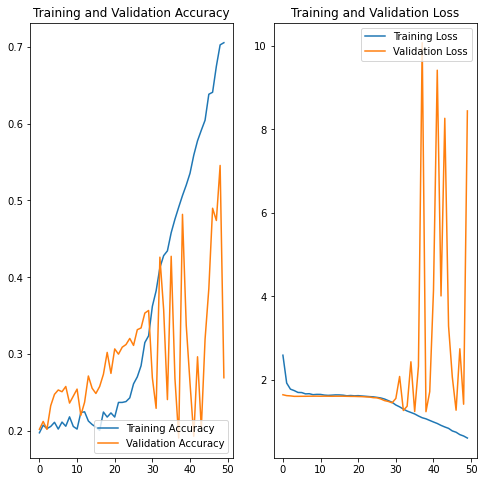

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [ ]:
history1 = model1.fit(X_train, y_train,
                    validation_data=(X_valid,y_valid),
                    steps_per_epoch=len(X_train)//batch_size,
                    epochs=10,
                    validation_steps=len(X_valid)//batch_size,
                    verbose=1)

In [ ]:
result = model1.evaluate(X_test,y_test)
print(dict(zip(model1.metrics_names, result)))
y_pred = model1.predict(X_test)
get_confusion_matrix(y_test, y_pred)

In [ ]:
model2 = tf.keras.models.Sequential()
VGG = VGG16(input_shape = (224, 224, 3), # Shape of our images
                 pooling="avg",
                 include_top = False, # Leave out the last fully connected layer
                 weights = 'imagenet')
mobilenetv2 = tf.keras.applications.MobileNetV2(
    input_shape=(img_size,img_size,3),
    include_top=False,
    weights='imagenet',
    pooling='avg',
)

In [ ]:
for layer in mobilenetv2.layers:
  layer.trainable = False

In [ ]:
model2.add(mobilenetv2)

In [ ]:
model2.add(tf.keras.layers.Dense(256,activation="relu"))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(256,activation="relu"))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(128,activation="relu"))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(5,activation="softmax"))

In [ ]:
model2.compile(optimizer=Adam(learning_rate= 0.001), loss='categorical_crossentropy', metrics = ['acc'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                        

In [ ]:
history2 = model2.fit(X_train, y_train,
                    validation_data=(X_valid,y_valid),
                    steps_per_epoch=len(X_train)//batch_size,
                    epochs=50,
                    validation_steps=len(X_valid)//batch_size,
                    verbose=1)

Epoch 1/50
110/110 [==============================] - 24s 69ms/step - loss: 1.4958 - acc: 0.3710 - val_loss: 0.9780 - val_acc: 0.6500
Epoch 2/50
110/110 [==============================] - 6s 56ms/step - loss: 0.9944 - acc: 0.6105 - val_loss: 0.6086 - val_acc: 0.7943
Epoch 3/50
110/110 [==============================] - 6s 56ms/step - loss: 0.7667 - acc: 0.7122 - val_loss: 0.4881 - val_acc: 0.8341
Epoch 4/50
110/110 [==============================] - 6s 56ms/step - loss: 0.6900 - acc: 0.7509 - val_loss: 0.4567 - val_acc: 0.8455
Epoch 5/50
110/110 [==============================] - 6s 56ms/step - loss: 0.6012 - acc: 0.7886 - val_loss: 0.3822 - val_acc: 0.8614
Epoch 6/50
110/110 [==============================] - 6s 56ms/step - loss: 0.5797 - acc: 0.7915 - val_loss: 0.3824 - val_acc: 0.8602
Epoch 7/50
110/110 [==============================] - 6s 56ms/step - loss: 0.5302 - acc: 0.8099 - val_loss: 0.4071 - val_acc: 0.8557
Epoch 8/50
110/110 [==============================] - 6s 56ms/step -

In [ ]:
result = model2.evaluate(X_test, y_test)
print(dict(zip(model2.metrics_names, result)))
y_pred = model2.predict(X_test)
get_confusion_matrix(y_test, y_pred)

4/4 [==============================] - 0s 81ms/step - loss: 0.4289 - acc: 0.8600
{'loss': 0.42890846729278564, 'acc': 0.8600000143051147}
4/4 [==============================] - 1s 41ms/step
tf.Tensor(
[[18  1  1  2  0]
 [ 0 17  0  0  0]
 [ 2  2 13  1  0]
 [ 4  0  0 20  0]
 [ 1  0  0  0 18]], shape=(5, 5), dtype=int32)


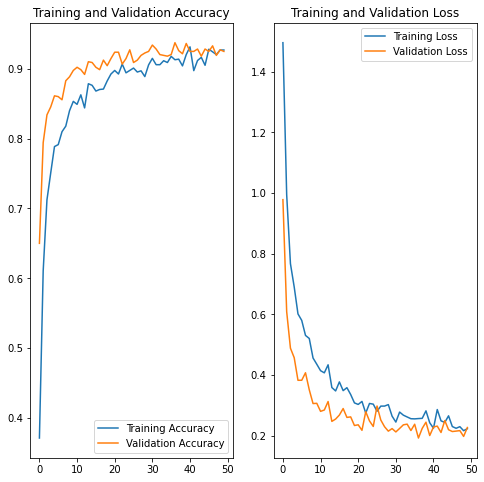

In [ ]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
inputShape = (img_size, img_size, 3)
chanDim = -1
inputs = tf.keras.layers.Input(shape=inputShape)
x = inputs

x = tf.keras.layers.Conv2D(32, (3, 3), strides=2, padding="same")(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)

x = tf.keras.layers.Conv2D(64, (3, 3), strides=2, padding="same")(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
volumeSize = K.int_shape(x)
x = tf.keras.layers.Flatten()(x)
latent = tf.keras.layers.Dense(500)(x)

encoder = tf.keras.models.Model(inputs, latent, name="encoder")
latentInputs = tf.keras.layers.Input(shape=(500,))
x = tf.keras.layers.Dense(np.prod(volumeSize[1:]))(latentInputs)
x = tf.keras.layers.Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)

x = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=2,padding="same")(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)

x = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2,padding="same")(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)

x = tf.keras.layers.Conv2DTranspose(3, (3, 3), padding="same")(x)
outputs = tf.keras.layers.Activation("sigmoid")(x)

decoder = tf.keras.models.Model(latentInputs, outputs, name="decoder")

autoencoder = tf.keras.models.Model(inputs, decoder(encoder(inputs)),name="autoencoder")


In [ ]:
noise_factor = 0.1
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_valid_noisy = X_valid + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_valid.shape)

testx = x_train_noisy

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_valid_noisy = np.clip(x_valid_noisy, 0., 1.)

In [ ]:
input_img = keras.Input(shape=(img_size, img_size, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
encoderasli = tf.keras.models.Model(input_img, encoded, name="encoder")

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.compile(adam, loss="mse")

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=25,
                batch_size=10,
                shuffle=True,
                validation_data=(X_valid, X_valid))

Epoch 1/25
352/352 [==============================] - 14s 31ms/step - loss: 0.0098 - val_loss: 0.0014
Epoch 2/25
352/352 [==============================] - 10s 30ms/step - loss: 0.0011 - val_loss: 9.0160e-04
Epoch 3/25
352/352 [==============================] - 10s 29ms/step - loss: 8.3117e-04 - val_loss: 7.4661e-04
Epoch 4/25
352/352 [==============================] - 10s 29ms/step - loss: 7.2605e-04 - val_loss: 6.7293e-04
Epoch 5/25
352/352 [==============================] - 10s 30ms/step - loss: 6.5764e-04 - val_loss: 6.2197e-04
Epoch 6/25
352/352 [==============================] - 10s 30ms/step - loss: 6.1290e-04 - val_loss: 5.7693e-04
Epoch 7/25
352/352 [==============================] - 10s 29ms/step - loss: 5.7885e-04 - val_loss: 5.5200e-04
Epoch 8/25
352/352 [==============================] - 10s 30ms/step - loss: 5.5348e-04 - val_loss: 5.4194e-04
Epoch 9/25
352/352 [==============================] - 10s 29ms/step - loss: 5.3399e-04 - val_loss: 5.1801e-04
Epoch 10/25
352/352 [=

In [ ]:
autoencoder.summary()
encoderasli.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        9248

1/1 [==============================] - 0s 190ms/step


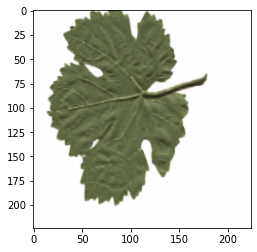

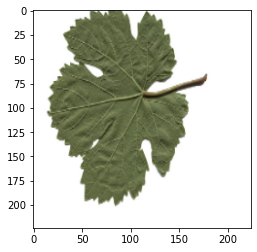

In [ ]:
X_Autoencoded = autoencoder.predict(X_train[:1])
plt.imshow(X_Autoencoded[0])
plt.show()
plt.imshow(X_train[0])

In [ ]:
X_reduced_train = encoderasli.predict(X_train)
X_reduced_valid = encoderasli.predict(X_valid)

28/28 [==============================] - 0s 13ms/step


In [ ]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (56,56,32)) ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(500,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = SEED),
    tf.keras.layers.Dense(5,activation = "softmax")   #Adding the Output Layer
])

In [ ]:
model5.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics = ['acc'])

In [ ]:
history5 = model5.fit(X_reduced_train, y_train,
                    validation_data=(X_reduced_valid,y_valid),
                    steps_per_epoch=len(X_reduced_train)//batch_size,
                    epochs=50,
                    validation_steps=len(X_reduced_valid)//batch_size,
                    verbose=1)

Epoch 1/50
110/110 [==============================] - 3s 17ms/step - loss: 1.7389 - acc: 0.2082 - val_loss: 1.6100 - val_acc: 0.2102
Epoch 2/50
110/110 [==============================] - 1s 12ms/step - loss: 1.6546 - acc: 0.2088 - val_loss: 1.6096 - val_acc: 0.2000
Epoch 3/50
110/110 [==============================] - 1s 12ms/step - loss: 1.6394 - acc: 0.2128 - val_loss: 1.6061 - val_acc: 0.2148
Epoch 4/50
110/110 [==============================] - 1s 12ms/step - loss: 1.6268 - acc: 0.2060 - val_loss: 1.6037 - val_acc: 0.2375
Epoch 5/50
110/110 [==============================] - 1s 12ms/step - loss: 1.6194 - acc: 0.2227 - val_loss: 1.5995 - val_acc: 0.3034
Epoch 6/50
110/110 [==============================] - 1s 13ms/step - loss: 1.6097 - acc: 0.2330 - val_loss: 1.5942 - val_acc: 0.3398
Epoch 7/50
110/110 [==============================] - 1s 12ms/step - loss: 1.6048 - acc: 0.2375 - val_loss: 1.5822 - val_acc: 0.3239
Epoch 8/50
110/110 [==============================] - 1s 12ms/step - 

In [ ]:
result = model5.evaluate(X_reduced_test, y_test)
print(dict(zip(model5.metrics_names, result)))
y_pred = model5.predict(X_reduced_test)
get_confusion_matrix(y_test, y_pred)

4/4 [==============================] - 0s 5ms/step - loss: 2.3791 - acc: 0.6600
{'loss': 2.3791327476501465, 'acc': 0.6600000262260437}
4/4 [==============================] - 0s 4ms/step
tf.Tensor(
[[14  0  2  0  0]
 [ 1  9  2  4  4]
 [ 1  0 17  4  0]
 [ 0  0  5 11  6]
 [ 1  0  1  3 15]], shape=(5, 5), dtype=int32)


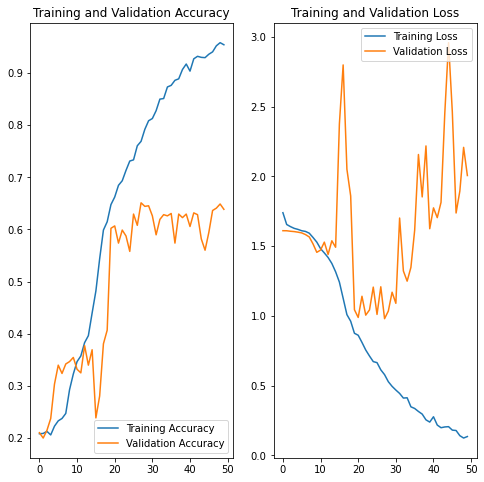

In [ ]:
acc = history5.history['acc']
val_acc = history5.history['val_acc']

loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(56, 56, 32), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [ ]:
history3 = model3.fit(X_reduced_train, y_train,
                    validation_data=(X_reduced_valid,y_valid),
                    steps_per_epoch=len(X_train)//batch_size,
                    epochs=50,
                    validation_steps=len(X_valid)//batch_size,
                    verbose=1)

Epoch 1/50
110/110 [==============================] - 3s 19ms/step - loss: 3.3238 - acc: 0.2142 - val_loss: 1.6254 - val_acc: 0.2023
Epoch 2/50
110/110 [==============================] - 2s 16ms/step - loss: 1.6754 - acc: 0.2119 - val_loss: 1.6094 - val_acc: 0.2364
Epoch 3/50
110/110 [==============================] - 2s 16ms/step - loss: 1.6126 - acc: 0.2210 - val_loss: 1.6180 - val_acc: 0.2341
Epoch 4/50
110/110 [==============================] - 2s 16ms/step - loss: 1.6185 - acc: 0.2159 - val_loss: 1.6079 - val_acc: 0.2398
Epoch 5/50
110/110 [==============================] - 2s 16ms/step - loss: 1.6054 - acc: 0.2304 - val_loss: 1.6086 - val_acc: 0.2250
Epoch 6/50
110/110 [==============================] - 2s 16ms/step - loss: 1.6060 - acc: 0.2278 - val_loss: 1.6039 - val_acc: 0.2352
Epoch 7/50
110/110 [==============================] - 2s 16ms/step - loss: 1.6071 - acc: 0.2261 - val_loss: 1.6039 - val_acc: 0.2239
Epoch 8/50
110/110 [==============================] - 2s 16ms/step - 

In [ ]:
X_reduced_test = encoderasli.predict(X_test)

4/4 [==============================] - 0s 24ms/step


In [ ]:
result = model3.evaluate(X_reduced_test, y_test)
print(dict(zip(model3.metrics_names, result)))
y_pred = model3.predict(X_reduced_test)
get_confusion_matrix(y_test, y_pred)

4/4 [==============================] - 0s 27ms/step - loss: 1.3742 - acc: 0.6200
{'loss': 1.3742390871047974, 'acc': 0.6200000047683716}
4/4 [==============================] - 0s 4ms/step
tf.Tensor(
[[15  0  0  1  0]
 [ 3 13  0  4  0]
 [ 3  0 13  6  0]
 [ 4  3  0 15  0]
 [ 4  0  2  8  6]], shape=(5, 5), dtype=int32)


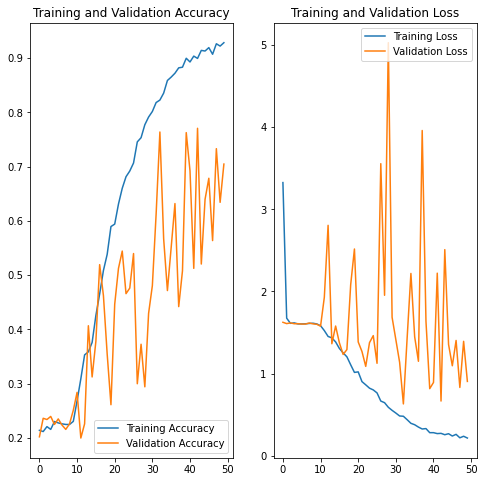

In [ ]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
kf = KFold(n_splits=10, shuffle=True, )
X = np.concatenate((X_train, X_valid))
y = np.concatenate((y_train, y_valid))
results = []
histories = []
for train_index, test_index in kf.split(X):
  X_train, X_valid = X[train_index], X[test_index]
  y_train, y_valid = y[train_index], y[test_index]
  model4 = 0
  model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (img_size,img_size,3)) ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(500,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.5,seed = SEED),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = SEED),
    tf.keras.layers.Dense(5,activation = "softmax")   #Adding the Output Layer
])
  model4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics = ['acc'])
  history4 = model4.fit(X_train, y_train,
                    validation_data=(X_valid,y_valid),
                    steps_per_epoch=len(X_train)//10,
                    epochs=20,
                    batch_size=10,
                    validation_steps=len(X_valid)//batch_size,
                    validation_batch_size=10,
                    verbose=1)
  print(history4)
  result = model4.evaluate(X_test, y_test)
  results.append(result)
  histories.append(history4)
  print(dict(zip(model4.metrics_names, result)))
  y_pred = model4.predict(X_test)
  get_confusion_matrix(y_test, y_pred)

Epoch 1/20
396/396 [==============================] - 9s 19ms/step - loss: 2.4495 - acc: 0.2028 - val_loss: 1.6007 - val_acc: 0.2385
Epoch 2/20
396/396 [==============================] - 7s 18ms/step - loss: 1.8498 - acc: 0.2081 - val_loss: 1.6019 - val_acc: 0.3231
Epoch 3/20
396/396 [==============================] - 7s 18ms/step - loss: 1.7393 - acc: 0.2083 - val_loss: 1.6042 - val_acc: 0.1692
Epoch 4/20
396/396 [==============================] - 7s 18ms/step - loss: 1.7099 - acc: 0.2015 - val_loss: 1.6064 - val_acc: 0.2231
Epoch 5/20
396/396 [==============================] - 7s 18ms/step - loss: 1.6846 - acc: 0.1980 - val_loss: 1.6083 - val_acc: 0.2769
Epoch 6/20
396/396 [==============================] - 7s 18ms/step - loss: 1.6634 - acc: 0.2058 - val_loss: 1.6050 - val_acc: 0.2538
Epoch 7/20
396/396 [==============================] - 7s 18ms/step - loss: 1.6627 - acc: 0.2177 - val_loss: 1.6105 - val_acc: 0.2077
Epoch 8/20
396/396 [==============================] - 7s 18ms/step - 

MemoryError: ignored